## ROIs plot function:

In [1]:
import numpy as np
import sys
import os
import shapely

from matplotlib import pyplot as plt
from shapely.geometry.polygon import Polygon

In [2]:
# %load C:\Users\Tóth Mátyás\Desktop\szakdolgozat\load_ROI.py
"""
Created on Fri Nov 18 20:40:37 2022

@author: luko.balazs
"""

import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry.polygon import Polygon as Polygon_shapely

def show_ROIs_drawn(self, suite2p_folder, cell, numbers):
    masks0 = np.load(suite2p_folder + '/plane0/'+ str(cell) + '/masks.npy', allow_pickle=True)
    masks1 = np.load(suite2p_folder + '/plane1/' + str(cell) + '/masks.npy', allow_pickle=True)
    img0 = np.load(suite2p_folder + '/plane0/mean_img.npy', allow_pickle=True)
    img1 = np.load(suite2p_folder + '/plane1/mean_img.npy', allow_pickle=True)
    polygons0 =  np.load(suite2p_folder + '/plane0/' + str(cell) + '/polygons.npy', allow_pickle=True)
    polygons1 = np.load(suite2p_folder + '/plane1/' + str(cell) + '/polygons.npy', allow_pickle=True)
    
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    
    # plane0
    fig0, ax2 = plt.subplots()
    ax2.matshow(img0)
    for i in range(polygons0.shape[0]):
        if len(colors)<=i:
            color=colors[i%len(colors)]
        else:
            color=colors[i]
            
        poly_points = polygons0[i]
        polygon_shape = Polygon_shapely(poly_points)
        ax2.plot(*polygon_shape.exterior.xy)
        
        if numbers:
            x = np.mean(masks0[i][:,1])
            y = np.mean(masks0[i][:,0])
            ax2.text(x,y,str(i),size=15, color = color, style = 'italic')
            
    # plane1
    fig1, ax3 = plt.subplots()
    ax3.matshow(img1)
    for i in range(polygons1.shape[0]):
        if len(colors)<=i:
            color=colors[i%len(colors)]
        else:
            color=colors[i]
            
        poly_points = polygons1[i]
        polygon_shape = Polygon_shapely(poly_points)
        ax3.plot(*polygon_shape.exterior.xy)
        if numbers:
            x = np.mean(masks1[i][:,1])
            y = np.mean(masks1[i][:,0])
            ax3.text(x,y,str(i+polygons0.shape[0]),size=15, color=color, style = 'italic')

In [3]:
def plane0_ROIs_drawn(suite2p_folder, cell, numbers):
    masks0 = np.load(suite2p_folder + '/plane0/'+ str(cell) + '/masks.npy', allow_pickle=True)
    img0 = np.load(suite2p_folder + '/plane0/mean_img.npy', allow_pickle=True)
    polygons0 =  np.load(suite2p_folder + '/plane0/' + str(cell) + '/polygons.npy', allow_pickle=True)
    
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    
    # plane0
    fig0, ax2 = plt.subplots()
    ax2.matshow(img0)
    for i in range(polygons0.shape[0]):
        if len(colors)<=i:
            color=colors[i%len(colors)]
        else:
            color=colors[i]
            
        poly_points = polygons0[i]
        polygon_shape = Polygon_shapely(poly_points)
        ax2.plot(*polygon_shape.exterior.xy)
        
        if numbers:
            x = np.mean(masks0[i][:,1])
            y = np.mean(masks0[i][:,0])
            ax2.text(x,y,str(i),size=15, color = color, style = 'italic')

In [4]:
suite2p_folder = 'C:/Users/Tóth Mátyás/Desktop/szakdolgozat/example_dendriric recording_numpy'
cell = 'c1'
numbers = [0,1,2,3,4,5,6]

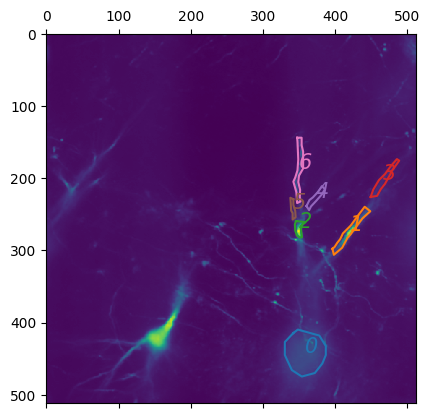

In [5]:
plane0_ROIs_drawn(suite2p_folder,cell,numbers)

In [6]:
imgs = np.load('C:/Users/Tóth Mátyás/Desktop/szakdolgozat/example_dendriric recording_numpy/plane0/0.npy')
roi_masks = np.load('C:/Users/Tóth Mátyás/Desktop/szakdolgozat/example_dendriric recording_numpy/c1/masks.npy', allow_pickle = True)

In [7]:
print(np.shape(roi_masks[0]))

(2744, 2)


## Extracting ROI masks:

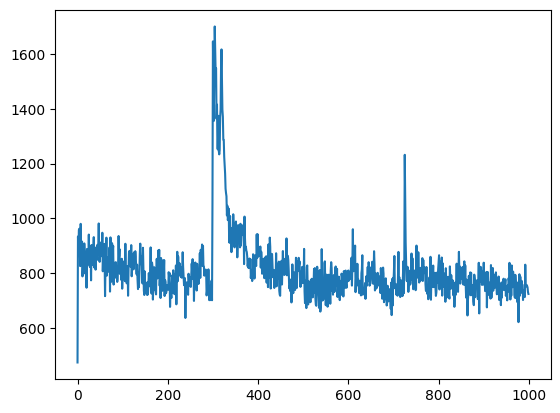

In [8]:
i_mask = 2
mask = roi_masks[i_mask]
L_mask = len(mask)
signal = np.zeros(imgs.shape[0])
for i_pixel in np.arange(L_mask):
    pix = mask[i_pixel]
    signal = signal + imgs[:,pix[0], pix[1]]
signal = signal / L_mask
fig0, ax2 = plt.subplots()
ax2.plot(signal)

In [9]:
def ROI_std(mask_number):  
    i_number = mask_number # mask numbers
    tensor = imgs # tensor
    rois = roi_masks # rois_masks
    mask_rois = rois[i_number] # list of roi masks
    len_mask_rois = len(mask_rois) # lenght of the roi masks list
    signal_rois = np.zeros(imgs.shape[0]) # empty tensor with the shape of original neuronal data
    for k in np.arange(len_mask_rois): 
        pix_rois = mask_rois[k] # mask pixels
        signal_rois = signal_rois + imgs[:,pix_rois[0], pix_rois[1]] # extracting mask pixels and placing them on the neuronal data
    signal_rois = signal_rois / len_mask_rois # extracting the signal by dividing the whole tensor by the number of the specific mask
    signal_max_amp = max(signal_rois) - np.median(signal_rois) # measuring the maximal signal amplitude
    DFpF = signal_rois / np.median(signal_rois) #DFpF
    ampl_DFpF = max(DFpF) -1 # DFpF amplitude with the same baseline 0
    print(np.median(signal_rois))
    return DFpF, signal_max_amp, ampl_DFpF, np.std(DFpF)

## SNR based on signal_DFpF/noise_DFpF

In [10]:
# Extracting DFpF amplitude, maximal amplitude and standard deviation of the signals

sigs = []
DFpF_amps = np.zeros(7)
sig_max_amps = np.zeros(7)
for i in range(7):
    sig, signal_max_amp, ampl_dfpf, SD_sig = ROI_std(i)
    sig_max_amps[i] = signal_max_amp
    DFpF_amps[i] = ampl_dfpf 
    sigs.append(sig)

352.9116253644315
522.3669950738916
790.2567567567568
285.03554502369667
263.5829694323144
271.5132743362832
322.2513863216266


In [11]:
print(DFpF_amps)

[0.33327964 0.95078924 1.15257443 0.28694351 0.15106734 0.38147388
 0.95398594]


In [12]:
print(sig_max_amps)

[117.61825802 496.66091954 910.82972973  81.78909953  39.81877729
 103.57522124 307.4232902 ]


In [13]:
print(np.mean(sig_max_amps))
print(np.mean(DFpF_amps))

293.9593279354801
0.6014448521128537


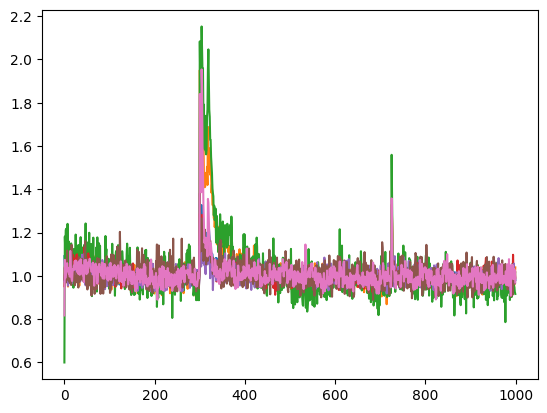

In [14]:
fig0, ax0 = plt.subplots()
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i in range(7):
    ax0.plot(sigs[i], color=colors[i])

In [15]:
noise_a = imgs[:, 12, 15]
noise_b = imgs[:, 74, 89]
noise_c = imgs[:, 89, 104]
noise_d = imgs[:, 125, 155]
noise_e = imgs[:, 199, 200]
noise_f = imgs[:, 240, 270]
noise_g = imgs[:, 276, 288]

random_noise_list = [noise_a, noise_b, noise_c, noise_d, noise_e, noise_f, noise_g]

In [16]:
noise_SDs = np.zeros(7)
orig_SDs = np.zeros(7)
for i_noise in np.arange(7):
    noise_DFpF = random_noise_list[i_noise] / np.median(random_noise_list[i_noise])
    orig_SDs[i_noise] = np.std(random_noise_list[i_noise]) 
    #noise_ampl_DFpF = max(noise_DFpF) - 1noise_DFpF = random_noise_list[i_noise] / np.median(random_noise_list[i_noise])
    noise_SDs[i_noise] = np.std(noise_DFpF)
    print(np.median(random_noise_list[i_noise]))

228.0
231.0
231.0
233.0
220.0
219.0
218.0


In [17]:
print(orig_SDs)

[41.18644126 48.99020064 49.49483358 46.45553384 42.91704295 52.93899413
 55.06692088]


In [18]:
print(noise_SDs)

[0.18064229 0.21207879 0.21426335 0.19937997 0.19507747 0.24173057
 0.25260055]


In [19]:
noise_DFpF_amps = noise_SDs.copy()

In [20]:
snr = np.mean(DFpF_amps)/np.mean(noise_DFpF_amps)
snr

2.8146744171526152

## Extracting random noisy pixels for synthetic noise generation

In [21]:
noise_std_a = np.std(imgs[:, 12, 15])
noise_std_b = np.std(imgs[:, 74, 89])
noise_std_c = np.std(imgs[:, 89, 104])
noise_std_d = np.std(imgs[:, 125, 155])
noise_std_e = np.std(imgs[:, 199, 200])
noise_std_f = np.std(imgs[:, 240, 270])
noise_std_g = np.std(imgs[:, 276, 288])

ave_noise_std = (noise_std_a
                    + noise_std_b
                    + noise_std_c
                    + noise_std_d
                    + noise_std_e
                    + noise_std_f
                    + noise_std_g)/7

noise_mean_a = np.mean(imgs[:, 12, 15])
noise_mean_b = np.mean(imgs[:, 74, 89])
noise_mean_c = np.mean(imgs[:, 89, 104])
noise_mean_d = np.mean(imgs[:, 125, 155])
noise_mean_e = np.mean(imgs[:, 199, 200])
noise_mean_f = np.mean(imgs[:, 240, 270])
noise_mean_g = np.mean(imgs[:, 276, 288])

ave_noise_mean = (noise_mean_a
                    + noise_mean_b
                    + noise_mean_c
                    + noise_mean_d
                    + noise_mean_e
                    + noise_mean_f
                    + noise_mean_g)/7

print(ave_noise_std)
print(ave_noise_mean)

48.14999532707918
239.625


## Gauss smoothing

In [22]:
def prepare_for_conv(signal_for_gauss):
    signal_for_gauss = signal_for_gauss.copy()
    empty = np.zeros(1010)
    signal_start = signal_for_gauss[0]
    signal_end = signal_for_gauss[999]
    empty[0:5] = signal_start
    empty[1005:1000] = signal_end
    empty[5:1005]=signal_for_gauss
    signal = empty.copy()
    return signal

In [23]:
signal1_prep = prepare_for_conv(sigs[0])
signal2_prep = prepare_for_conv(sigs[1])
signal3_prep = prepare_for_conv(sigs[2])
signal4_prep = prepare_for_conv(sigs[3])
signal5_prep = prepare_for_conv(sigs[4])
signal6_prep = prepare_for_conv(sigs[5])
signal7_prep = prepare_for_conv(sigs[6])

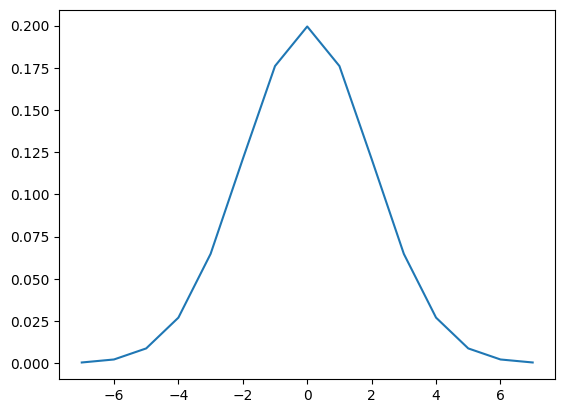

In [24]:
x = np.arange(-7,8,1)
sigma = 2
normal = 1 / (2.0 * np.pi * sigma**2)
gauss_kernel_beta =  np.exp(-((x**2) / (2.0*sigma**2))) * normal
gauss_kernel = gauss_kernel_beta / np.sum(gauss_kernel_beta)
plt.plot(x,gauss_kernel)

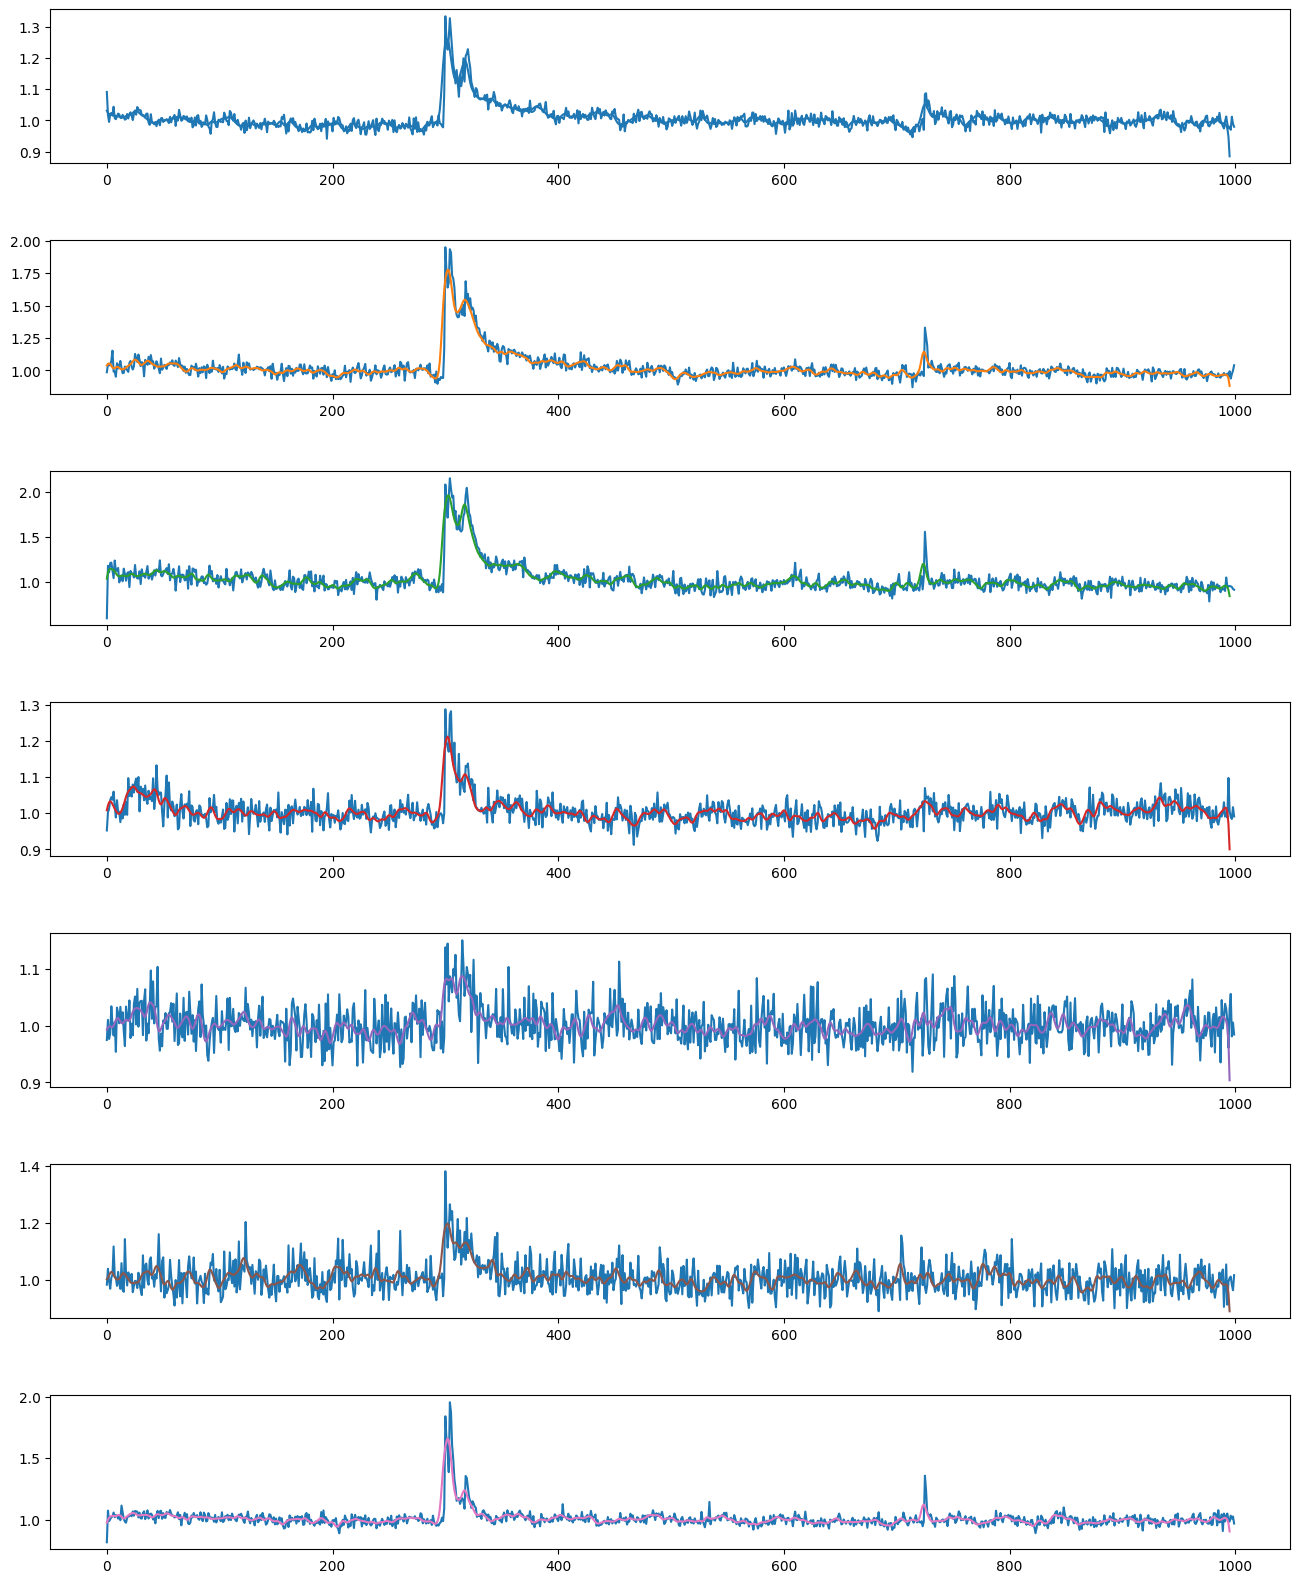

In [25]:
# plotting the gauss smoothed signals

signal1_smooth = np.convolve(signal1_prep,gauss_kernel, mode='valid')
signal2_smooth = np.convolve(signal2_prep,gauss_kernel, mode='valid')
signal3_smooth = np.convolve(signal3_prep,gauss_kernel, mode='valid')
signal4_smooth = np.convolve(signal4_prep,gauss_kernel, mode='valid')
signal5_smooth = np.convolve(signal5_prep,gauss_kernel, mode='valid')
signal6_smooth = np.convolve(signal6_prep,gauss_kernel, mode='valid')
signal7_smooth = np.convolve(signal7_prep,gauss_kernel, mode='valid')


fig, axs = plt.subplots(7, 1,figsize=(16,20))
plt.subplots_adjust(hspace=0.5)

axs[0].plot(sigs[0])
axs[0].plot(signal1_smooth, color=colors[0])
axs[1].plot(sigs[1])
axs[1].plot(signal2_smooth, color=colors[1])
axs[2].plot(sigs[2])
axs[2].plot(signal3_smooth, color=colors[2])
axs[3].plot(sigs[3])
axs[3].plot(signal4_smooth, color=colors[3])
axs[4].plot(sigs[4])
axs[4].plot(signal5_smooth, color=colors[4])
axs[5].plot(sigs[5])
axs[5].plot(signal6_smooth, color=colors[5])
axs[6].plot(sigs[6])
axs[6].plot(signal7_smooth, color=colors[6])

## Event detection

In [26]:
def event_detector(event):

    threshold_upper = 1.08
    threshold_lower = 1.03

    event_alpha = event > threshold_lower;
    event_beta = event > threshold_upper;

    z_events = np.zeros(996);

    for i in range(996):
        if  (event_alpha[i].any() == True) and (event_beta[i].any() == True):
            z_events[i] = 1
        else:
            z_events[i] == 0
            
    return z_events

In [27]:
sig1_event = event_detector(signal1_smooth)
sig2_event = event_detector(signal2_smooth)
sig3_event = event_detector(signal3_smooth)
sig4_event = event_detector(signal4_smooth)
sig5_event = event_detector(signal5_smooth)
sig6_event = event_detector(signal6_smooth)
sig7_event = event_detector(signal7_smooth)

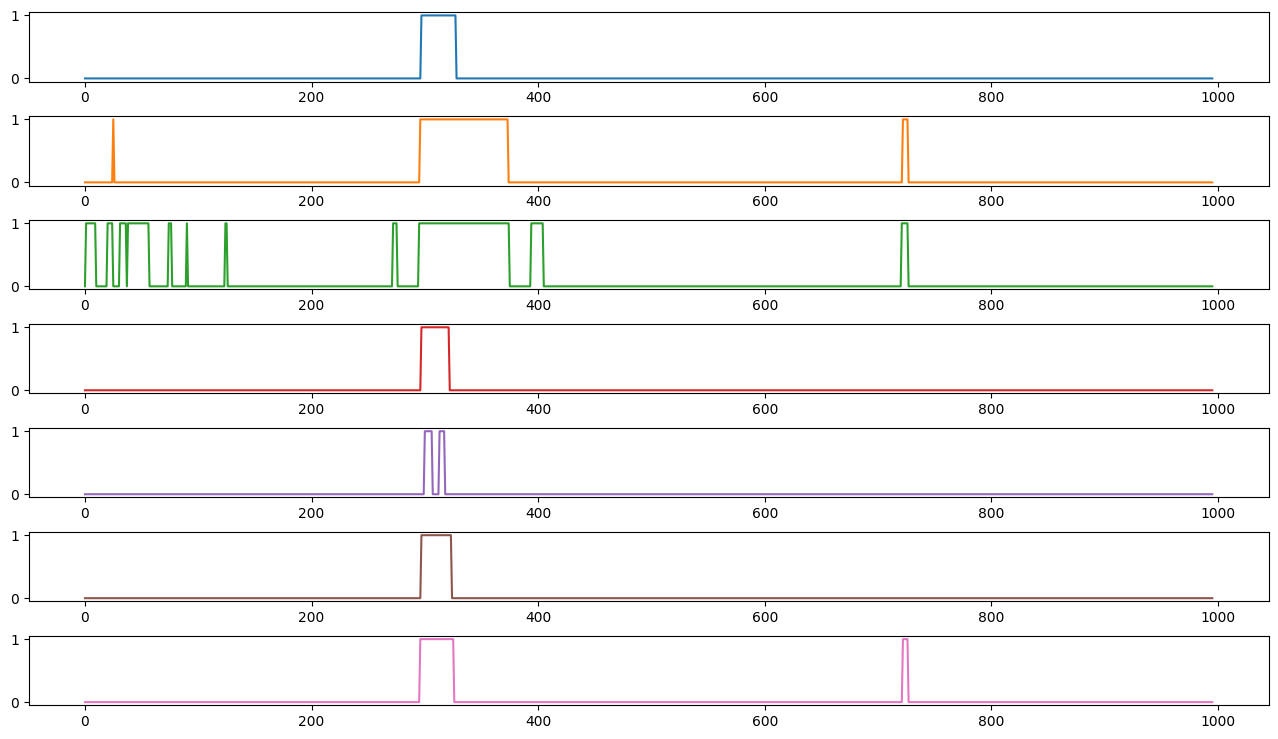

In [28]:
f, axs = plt.subplots(7,1,figsize=(16,9))
plt.subplots_adjust(hspace=0.5)

axs[0].plot(sig1_event, color=colors[0])
axs[1].plot(sig2_event, color=colors[1])
axs[2].plot(sig3_event, color=colors[2])
axs[3].plot(sig4_event, color=colors[3])
axs[4].plot(sig5_event, color=colors[4])
axs[5].plot(sig6_event, color=colors[5])
axs[6].plot(sig7_event, color=colors[6])